In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ML_project

/content/drive/MyDrive/ML_project


In [38]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import naive_bayes
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [121]:
#데이터 불러오기
data=pd.read_csv("./high_diamond_ranked_10min.csv")

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [56]:
data.head()

gameId  blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
0  4519157822         0               28                   2               1   
1  4523371949         0               12                   1               0   
2  4521474530         0               15                   0               0   
3  4524384067         0               43                   1               0   
4  4436033771         0               75                   4               0   

   blueKills  blueDeaths  blueAssists  blueEliteMonsters  blueDragons  \
0          9           6           11                  0            0   
1          5           5            5                  0            0   
2          7          11            4                  1            1   
3          4           5            5                  1            0   
4          6           6            6                  0            0   

   blueHeralds  blueTowersDestroyed  blueTotalGold  blueAvgLevel  \
0            0                    0          17210           6.6   
1            0                    0          14712           6.6   
2            0                    0          16113           6.4   
3            1                    0          15157           7.0   
4            0                    0          16400           7.0   

   blueTotalExperience  blueTotalMinionsKilled  blueTotalJungleMinionsKilled  \
0                17039                     195                            36   
1                16265                     174                            43   
2                16221                     186                            46   
3                17954                     201                            55   
4                18543                     210                            57   

   blueGoldDiff  blueExperienceDiff  blueCSPerMin  blueGoldPerMin  \
0           643                  -8          19.5          1721.0   
1         -2908               -1173          17.4          1471.2   
2         -1172               -1033          18.6          1611.3   
3         -1321                  -7          20.1          1515.7   
4         -1004                 230          21.0          1640.0   

   redWardsPlaced  redWardsDestroyed  redFirstBlood  redKills  redDeaths  \
0              15                  6              0         6          9   
1              12                  1              1         5          5   
2              15                  3              1        11          7   
3              15                  2              1         5          4   
4              17                  2              1         6          6   

   redAssists  redEliteMonsters  redDragons  redHeralds  redTowersDestroyed  \
0           8                 0           0           0                   0   
1           2                 2           1           1                   1   
2          14                 0           0           0                   0   
3          10                 0           0           0                   0   
4           7                 1           1           0                   0   

   redTotalGold  redAvgLevel  redTotalExperience  redTotalMinionsKilled  \
0         16567          6.8               17047                    197   
1         17620          6.8               17438                    240   
2         17285          6.8               17254                    203   
3         16478          7.0               17961                    235   
4         17404          7.0               18313                    225   

   redTotalJungleMinionsKilled  redGoldDiff  redExperienceDiff  redCSPerMin  \
0                           55         -643                  8         19.7   
1                           52         2908               1173         24.0   
2                           28         1172               1033         20.3   
3                           47         1321                  7         23.5   
4   

In [123]:
# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data.drop(data.columns[[0] + [14] + [17] + [20] + list(range(21, 40))], inplace=True, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [10]:
data.head()

blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
0         0               28                   2               1          9   
1         0               12                   1               0          5   
2         0               15                   0               0          7   
3         0               43                   1               0          4   
4         0               75                   4               0          6   

   blueDeaths  blueAssists  blueEliteMonsters  blueDragons  blueHeralds  \
0           6           11                  0            0            0   
1           5            5                  0            0            0   
2          11            4                  1            1            0   
3           5            5                  1            0            1   
4           6            6                  0            0            0   

   blueTowersDestroyed  blueTotalGold  blueAvgLevel  blueTotalExperience  \
0                    0          17210           6.6                17039   
1                    0          14712           6.6                16265   
2                    0          16113           6.4                16221   
3                    0          15157           7.0                17954   
4                    0          16400           7.0                18543   

   blueTotalMinionsKilled  blueTotalJungleMinionsKilled  blueExperienceDiff  \
0                     195                            36                  -8   
1                     174                            43               -1173   
2                     186                            46               -1033   
3                     201                            55                  -7   
4                     210                            57                 230   

   blueCSPerMin  
0          19.5  
1          17.4  
2          18.6  
3          20.1  
4          21.0

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [124]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X_train:", X_train.shape, "y_train :", y_train.shape)
print("X_test:",X_test.shape,"y_test:", y_test.shape)



X_train: (6915, 16) y_train : (6915,)
X_test: (2964, 16) y_test: (2964,)


In [115]:

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr = lr.predict(X_test)
acc_train_lr = r2_score(y_train, y_pred_train_lr)
acc_test_lr = r2_score(y_test, y_pred_test_lr)
print(f'Linear Regression - Train Acc: {acc_train_lr:.4f}, Test Acc: {acc_test_lr:.4f}')

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)
acc_train_ridge = r2_score(y_train, y_pred_train_ridge)
acc_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'Ridge Regression - Train Acc: {acc_train_ridge:.4f}, Test Acc: {acc_test_ridge:.4f}')

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)
acc_train_lasso = r2_score(y_train, y_pred_train_lasso)
acc_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f'Lasso Regression - Train Acc: {acc_train_lasso:.4f}, Test Acc: {acc_test_lasso:.4f}')

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly2_train = poly.fit_transform(X_train)
X_poly2_test = poly.transform(X_test)
lr_poly2 = LinearRegression()
lr_poly2.fit(X_poly2_train, y_train)
y_pred_train_poly2 = lr_poly2.predict(X_poly2_train)
y_pred_test_poly2 = lr_poly2.predict(X_poly2_test)
acc_train_poly2 = r2_score(y_train, y_pred_train_poly2)
acc_test_poly2 = r2_score(y_test, y_pred_test_poly2)
print(f'Polynomial Regression (Degree 2) - Train Acc: {acc_train_poly2:.4f}, Test Acc: {acc_test_poly2:.4f}')

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly3_train = poly.fit_transform(X_train)
X_poly3_test = poly.transform(X_test)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_poly3_train, y_train)
y_pred_train_poly3 = lr_poly3.predict(X_poly3_train)
y_pred_test_poly3 = lr_poly3.predict(X_poly3_test)
acc_train_poly3 = r2_score(y_train, y_pred_train_poly3)
acc_test_poly3 = r2_score(y_test, y_pred_test_poly3)
print(f'Polynomial Regression (Degree 3) - Train Acc: {acc_train_poly3:.4f}, Test Acc: {acc_test_poly3:.4f}')

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_train_tree = tree.predict(X_train)
y_pred_test_tree = tree.predict(X_test)
acc_train_tree = r2_score(y_train, y_pred_train_tree)
acc_test_tree = r2_score(y_test, y_pred_test_tree)
print(f'Decision Tree - Train Acc: {acc_train_tree:.4f}, Test Acc: {acc_test_tree:.4f}')

Linear Regression - Train Acc: 0.6325, Test Acc: 0.6397
Ridge Regression - Train Acc: 0.6325, Test Acc: 0.6397
Lasso Regression - Train Acc: 0.5468, Test Acc: 0.5572
Polynomial Regression (Degree 2) - Train Acc: 0.6482, Test Acc: 0.6419
Polynomial Regression (Degree 3) - Train Acc: 0.6822, Test Acc: -1.6771
Decision Tree - Train Acc: 1.0000, Test Acc: 0.2430


In [116]:
import pandas as pd

# 결과를 DataFrame으로 정리
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Poly Regression (Degree 2)', 'Poly Regression (Degree 3)', 'Decision Tree'],
    'Train Acc': [acc_train_lr, acc_train_ridge, acc_train_lasso, acc_train_poly2, acc_train_poly3, acc_train_tree],
    'Test Acc': [acc_test_lr, acc_test_ridge, acc_test_lasso, acc_test_poly2, acc_test_poly3, acc_test_tree]
})

# 결과 출력
print(results)


                        Model  Train Acc  Test Acc
0           Linear Regression   0.632500  0.639674
1            Ridge Regression   0.632500  0.639679
2            Lasso Regression   0.546837  0.557155
3  Poly Regression (Degree 2)   0.648228  0.641929
4  Poly Regression (Degree 3)   0.682216 -1.677133
5               Decision Tree   1.000000  0.243000


In [ ]:
# 'blueAvgLevel'을 제외한 열의 이름 가져오기
feature_names = data.drop('blueAvgLevel', axis=1).columns

# 각 열의 이름 출력
for i, feature_name in enumerate(feature_names):
    print(f"{i+1}. {feature_name}")


1. blueWins
2. blueWardsPlaced
3. blueWardsDestroyed
4. blueFirstBlood
5. blueKills
6. blueDeaths
7. blueAssists
8. blueEliteMonsters
9. blueDragons
10. blueHeralds
11. blueTowersDestroyed
12. blueTotalGold
13. blueTotalExperience
14. blueTotalMinionsKilled
15. blueTotalJungleMinionsKilled
16. blueExperienceDiff
17. blueCSPerMin


In [ ]:
data['blueAvgLevel'].value_counts()

7.0    2611
6.8    2442
7.2    1779
6.6    1339
7.4     684
6.4     578
6.2     175
7.6     174
6.0      43
7.8      28
5.8      13
5.6       4
5.4       3
8.0       2
5.2       2
4.8       1
4.6       1
Name: blueAvgLevel, dtype: int64

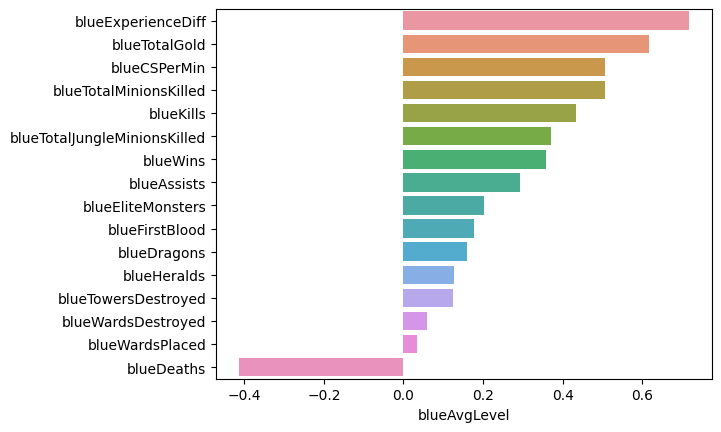

In [13]:
# Correlation of blue team's metrics with blueWins
# Dropping negative values (e.g. blueDeaths)

corr = data.corr()["blueAvgLevel"].drop(['blueAvgLevel', 'blueTotalExperience'])
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.show()


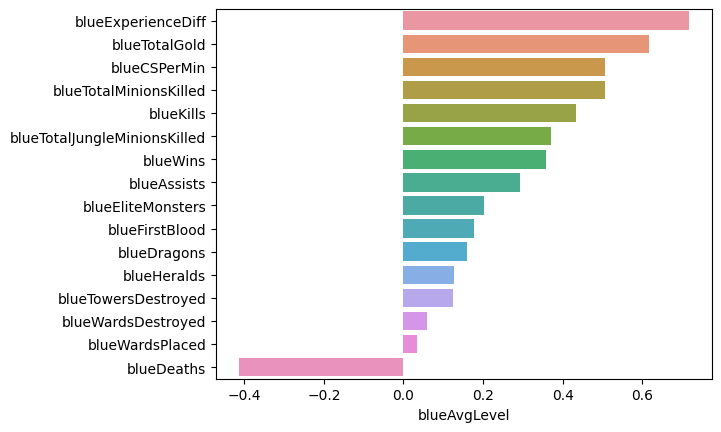

In [40]:
# Correlation of blue team's metrics with blueWins
# Dropping negative values (e.g. blueDeaths)

corr = data.corr()["blueAvgLevel"].drop(['blueAvgLevel'])
corr = corr.sort_values(ascending=False)
sns.barplot(x=corr, y=corr.index)
plt.show()

In [18]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#데이터 불러오기
data=pd.read_csv("./high_diamond_ranked_10min.csv")

# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data.drop(data.columns[[0] + [17] + [20] + [14] + list(range(21, 40))], inplace=True, axis=1)
data.info()


# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X1_train:", X1_train.shape, "y1_train :", y1_train.shape)
print("X1_test:",X1_test.shape,"y1_test:", y1_test.shape)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

 1) blueExperienceDiff             0.575850
 2) blueTotalGold                  0.092052
 3) blueTotalJungleMinionsKilled   0.072670
 4) blueTotalMinionsKilled         0.047732
 5) blueCSPerMin                   0.046844
 6) blueWardsPlaced                0.037303
 7) blueAssists                    0.029667
 8) blueDeaths                     0.027869
 9) blueWardsDestroyed             0.023076
10) blueKills                      0.018127
11) blueEliteMonsters              0.006616
12) blueFirstBlood                 0.005486
13) blueWins                       0.005486
14) blueDragons                    0.004440
15) blueHeralds                    0.004006
16) blueTowersDestroyed            0.002776


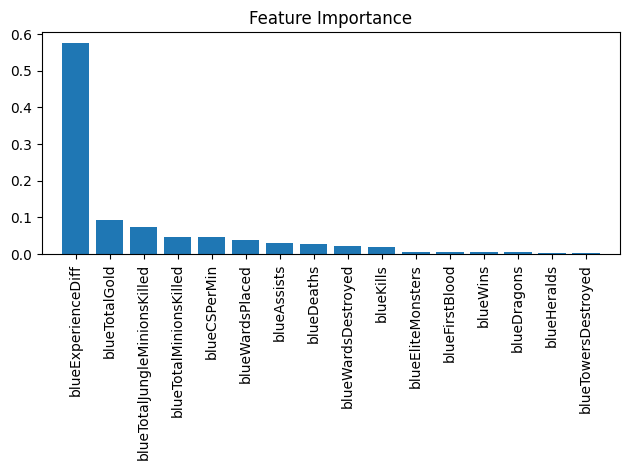

In [20]:
from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 사용하여 모델 초기화
forest = RandomForestRegressor(n_estimators=500, random_state=1)
feat_labels = data.drop('blueAvgLevel', axis=1).columns
# 학습
forest.fit(X1_train, y1_train)

# 특징 중요도 출력
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X1_train.shape[1]):
    print("%2d) %-*s %f"% (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# 시각화
plt.title('Feature Importance')
plt.bar(range(X1_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X1_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.tight_layout()
plt.show()


In [22]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#데이터 불러오기
data=pd.read_csv("./high_diamond_ranked_10min.csv")

# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data.drop(data.columns[[0] + [17] + [18] + [20] + [14] + list(range(21, 40))], inplace=True, axis=1)
data.info()


# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X1_train:", X1_train.shape, "y1_train :", y1_train.shape)
print("X1_test:",X1_test.shape,"y1_test:", y1_test.shape)

from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 사용하여 모델 초기화
forest = RandomForestRegressor(n_estimators=500, random_state=1)
feat_labels = data.drop('blueAvgLevel', axis=1).columns
# 학습
forest.fit(X1_train, y1_train)

# 특징 중요도 출력
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X1_train.shape[1]):
    print("%2d) %-*s %f"% (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# 시각화
plt.title('Feature Importance')
plt.bar(range(X1_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X1_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.tight_layout()
plt.show()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalMinionsKilled        9879 non-null   int64  
 13  blu

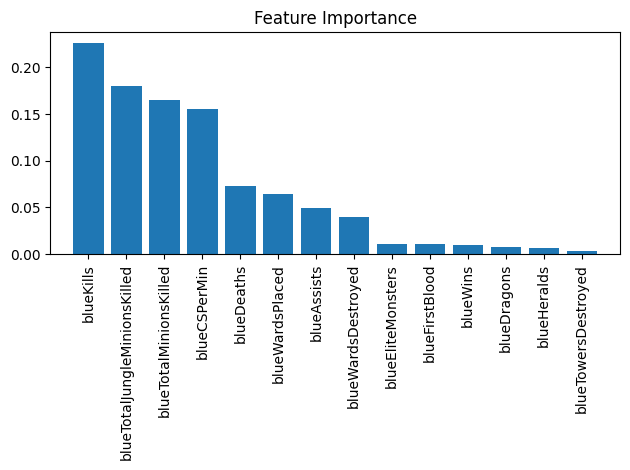

In [23]:
# 필요한 라이브러리 임포트
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#데이터 불러오기
data=pd.read_csv("./high_diamond_ranked_10min.csv")

# Drop repeatedly and redundant columns (e.g. gameId, red-based); retain the blue's metrics only.
data.drop(data.columns[[0] + [12] + [17] + [18] + [20] + [14] + list(range(21, 40))], inplace=True, axis=1)
data.info()


# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)


print("X1_train:", X1_train.shape, "y1_train :", y1_train.shape)
print("X1_test:",X1_test.shape,"y1_test:", y1_test.shape)

from sklearn.ensemble import RandomForestRegressor

# RandomForestRegressor를 사용하여 모델 초기화
forest = RandomForestRegressor(n_estimators=500, random_state=1)
feat_labels = data.drop('blueAvgLevel', axis=1).columns
# 학습
forest.fit(X1_train, y1_train)

# 특징 중요도 출력
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X1_train.shape[1]):
    print("%2d) %-*s %f"% (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

# 시각화
plt.title('Feature Importance')
plt.bar(range(X1_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X1_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X1_train.shape[1]])
plt.tight_layout()
plt.show()


 1) blueTotalExperience            0.841528
 2) blueExperienceDiff             0.024605
 3) blueTotalGold                  0.022216
 4) blueTotalJungleMinionsKilled   0.017540
 5) blueWardsPlaced                0.016438
 6) blueDeaths                     0.012072
 7) blueAssists                    0.011885
 8) blueCSPerMin                   0.011507
 9) blueTotalMinionsKilled         0.011432
10) blueWardsDestroyed             0.011076
11) blueKills                      0.007727
12) blueEliteMonsters              0.002940
13) blueWins                       0.002273
14) blueFirstBlood                 0.002107
15) blueHeralds                    0.002037
16) blueDragons                    0.001850
17) blueTowersDestroyed            0.000768


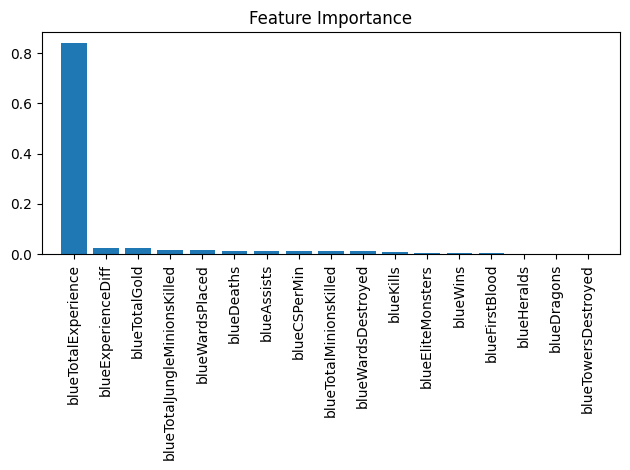

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 스케일 조정
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# RandomForestRegressor를 사용하여 모델 초기화
forest = RandomForestRegressor(n_estimators=500, random_state=1)

# 학습
forest.fit(X_train_scaled, y_train)

# 특징 중요도 출력
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"% (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))


# 시각화
plt.title('Feature Importance')
plt.bar(range(X_train_scaled.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train_scaled.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train_scaled.shape[1]])
plt.tight_layout()
plt.show()


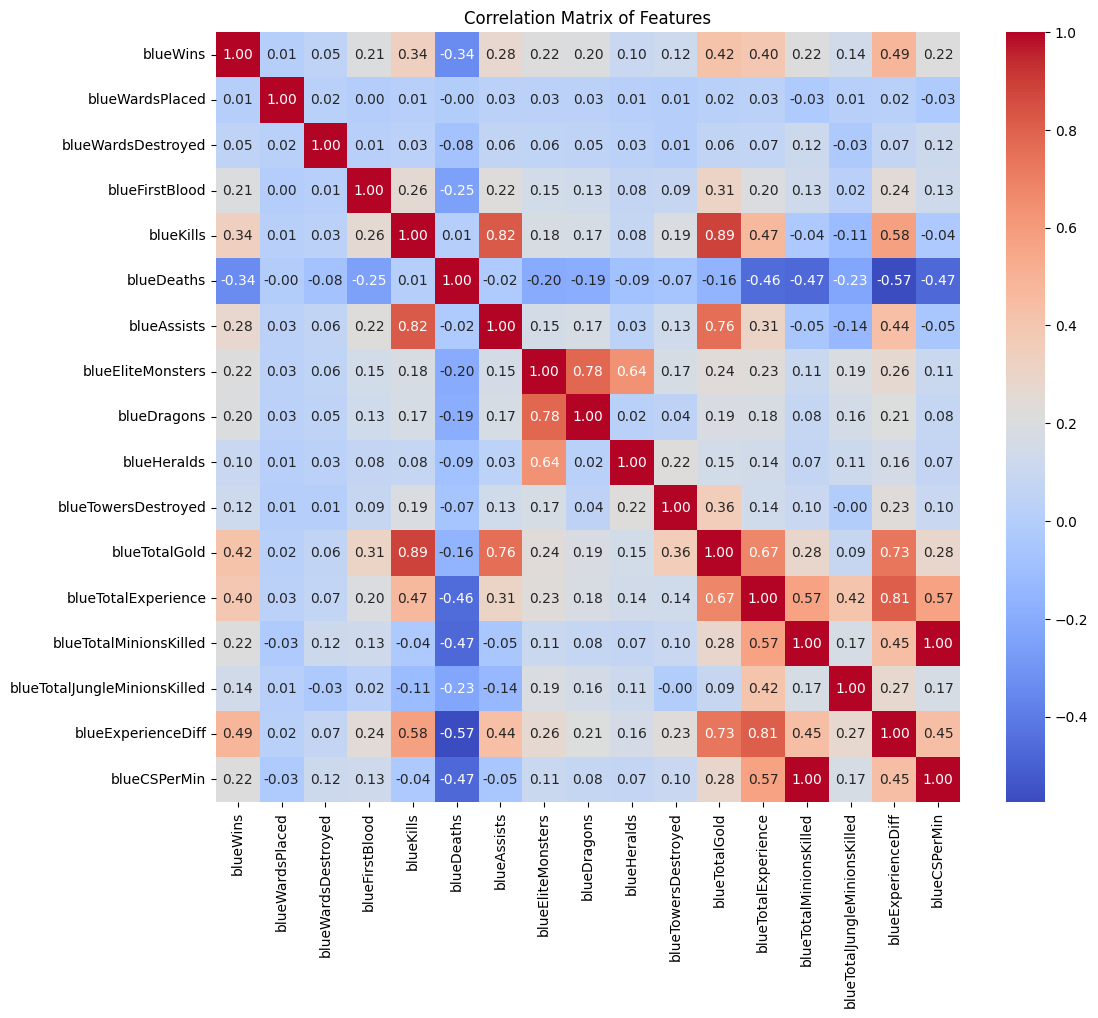

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# X_train을 사용하여 상관 행렬을 생성
correlation_matrix = np.corrcoef(X_train, rowvar=False)

# seaborn 라이브러리를 사용하여 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=feat_labels, yticklabels=feat_labels)
plt.title('Correlation Matrix of Features')
plt.show()


In [41]:
# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values

# 'blueAvgLevel' 열을 y에 할당
y = data['blueAvgLevel'].values

# Train:Test=8:2로 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train set을 다시 Train:Validation=8:2로 나누기
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 결과 출력
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (6322, 16) (6322,)
Validation set: (1581, 16) (1581,)
Test set: (1976, 16) (1976,)


In [53]:
# 결과 출력
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (6322, 16) (6322,)
Test set: (1976, 16) (1976,)


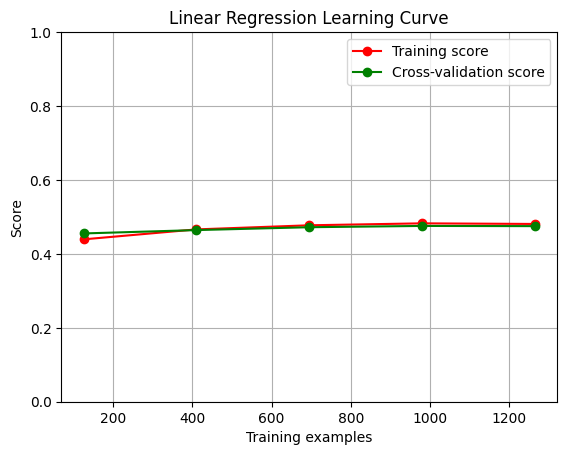

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 함수 정의
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    else:
        plt.ylim(0, 1)  # y축 범위를 0에서 1로 설정
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Linear Regression Learning Curve
estimator_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
plot_learning_curve(estimator_lr, "Linear Regression Learning Curve", X_val, y_val, cv=5)
plt.show()


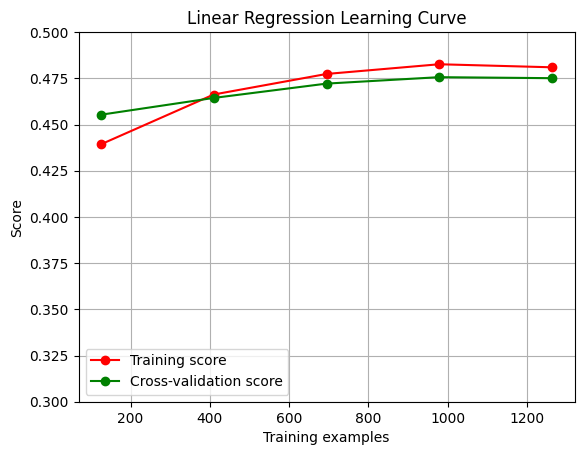

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# 함수 정의
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    else:
        plt.ylim(0.3, 0.5)  # y축 범위를 0에서 1로 설정
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Linear Regression Learning Curve
estimator_lr = make_pipeline(StandardScaler(), PCA(n_components=2), LinearRegression())
plot_learning_curve(estimator_lr, "Linear Regression Learning Curve", X_val, y_val, cv=5)
plt.show()


In [111]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기 (data는 당신의 데이터프레임일 것입니다)
# 예시로 랜덤 데이터 생성
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'blueAvgLevel': 3 * np.random.rand(100) + 2
})


# 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_val_lr = lr.predict(X_val)
y_pred_test_lr = lr.predict(X_test)
acc_train_lr = r2_score(y_train, y_pred_train_lr)
acc_val_lr = r2_score(y_val, y_pred_val_lr)
acc_test_lr = r2_score(y_test, y_pred_test_lr)
print(f'Linear Regression - Train Acc: {acc_train_lr:.4f}, Validation Acc: {acc_val_lr:.4f}, Test Acc: {acc_test_lr:.4f}')

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_val_ridge = ridge.predict(X_val)
y_pred_test_ridge = ridge.predict(X_test)
acc_train_ridge = r2_score(y_train, y_pred_train_ridge)
acc_val_ridge = r2_score(y_val, y_pred_val_ridge)
acc_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'Ridge Regression - Train Acc: {acc_train_ridge:.4f}, Validation Acc: {acc_val_ridge:.4f}, Test Acc: {acc_test_ridge:.4f}')

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_val_lasso = lasso.predict(X_val)
y_pred_test_lasso = lasso.predict(X_test)
acc_train_lasso = r2_score(y_train, y_pred_train_lasso)
acc_val_lasso = r2_score(y_val, y_pred_val_lasso)
acc_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f'Lasso Regression - Train Acc: {acc_train_lasso:.4f}, Validation Acc: {acc_val_lasso:.4f}, Test Acc: {acc_test_lasso:.4f}')

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly2_train = poly.fit_transform(X_train)
X_poly2_val = poly.transform(X_val)
X_poly2_test = poly.transform(X_test)
lr_poly2 = LinearRegression()
lr_poly2.fit(X_poly2_train, y_train)
y_pred_train_poly2 = lr_poly2.predict(X_poly2_train)
y_pred_val_poly2 = lr_poly2.predict(X_poly2_val)
y_pred_test_poly2 = lr_poly2.predict(X_poly2_test)
acc_train_poly2 = r2_score(y_train, y_pred_train_poly2)
acc_val_poly2 = r2_score(y_val, y_pred_val_poly2)
acc_test_poly2 = r2_score(y_test, y_pred_test_poly2)
print(f'Polynomial Regression (Degree 2) - Train Acc: {acc_train_poly2:.4f}, Validation Acc: {acc_val_poly2:.4f}, Test Acc: {acc_test_poly2:.4f}')

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly3_train = poly.fit_transform(X_train)
X_poly3_val = poly.transform(X_val)
X_poly3_test = poly.transform(X_test)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_poly3_train, y_train)
y_pred_train_poly3 = lr_poly3.predict(X_poly3_train)
y_pred_val_poly3 = lr_poly3.predict(X_poly3_val)
y_pred_test_poly3 = lr_poly3.predict(X_poly3_test)
acc_train_poly3 = r2_score(y_train, y_pred_train_poly3)
acc_val_poly3 = r2_score(y_val, y_pred_val_poly3)
acc_test_poly3 = r2_score(y_test, y_pred_test_poly3)
print(f'Polynomial Regression (Degree 3) - Train Acc: {acc_train_poly3:.4f}, Validation Acc: {acc_val_poly3:.4f}, Test Acc: {acc_test_poly3:.4f}')

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_train_tree = tree.predict(X_train)
y_pred_val_tree = tree.predict(X_val)
y_pred_test_tree = tree.predict(X_test)
acc_train_tree = r2_score(y_train, y_pred_train_tree)
acc_val_tree = r2_score(y_val, y_pred_val_tree)
acc_test_tree = r2_score(y_test, y_pred_test_tree)
print(f'Decision Tree - Train Acc: {acc_train_tree:.4f}, Validation Acc: {acc_val_tree:.4f}, Test Acc: {acc_test_tree:.4f}')


Linear Regression - Train Acc: 0.6325, Validation Acc: 0.6129, Test Acc: 0.6397
Ridge Regression - Train Acc: 0.6325, Validation Acc: 0.6129, Test Acc: 0.6397
Lasso Regression - Train Acc: 0.5468, Validation Acc: 0.5330, Test Acc: 0.5572
Polynomial Regression (Degree 2) - Train Acc: 0.6482, Validation Acc: 0.6170, Test Acc: 0.6419
Polynomial Regression (Degree 3) - Train Acc: 0.6822, Validation Acc: -3.8446, Test Acc: -1.6771
Decision Tree - Train Acc: 1.0000, Validation Acc: 0.7048, Test Acc: 0.2492


In [112]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 불러오기 (data는 당신의 데이터프레임일 것입니다)
# 예시로 랜덤 데이터 생성
data = pd.DataFrame({
    'Feature1': np.random.rand(100),
    'Feature2': np.random.rand(100),
    'Feature3': np.random.rand(100),
    'blueAvgLevel': 3 * np.random.rand(100) + 2
})


# 선형 회귀
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_val_lr = lr.predict(X_val)
y_pred_test_lr = lr.predict(X_test)
acc_train_lr = r2_score(y_train, y_pred_train_lr)
acc_val_lr = r2_score(y_val, y_pred_val_lr)
acc_test_lr = r2_score(y_test, y_pred_test_lr)
print(f'Linear Regression - Train Acc: {acc_train_lr:.4f}, Validation Acc: {acc_val_lr:.4f}, Test Acc: {acc_test_lr:.4f}')

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_train_ridge = ridge.predict(X_train)
y_pred_val_ridge = ridge.predict(X_val)
y_pred_test_ridge = ridge.predict(X_test)
acc_train_ridge = r2_score(y_train, y_pred_train_ridge)
acc_val_ridge = r2_score(y_val, y_pred_val_ridge)
acc_test_ridge = r2_score(y_test, y_pred_test_ridge)
print(f'Ridge Regression - Train Acc: {acc_train_ridge:.4f}, Validation Acc: {acc_val_ridge:.4f}, Test Acc: {acc_test_ridge:.4f}')

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_train_lasso = lasso.predict(X_train)
y_pred_val_lasso = lasso.predict(X_val)
y_pred_test_lasso = lasso.predict(X_test)
acc_train_lasso = r2_score(y_train, y_pred_train_lasso)
acc_val_lasso = r2_score(y_val, y_pred_val_lasso)
acc_test_lasso = r2_score(y_test, y_pred_test_lasso)
print(f'Lasso Regression - Train Acc: {acc_train_lasso:.4f}, Validation Acc: {acc_val_lasso:.4f}, Test Acc: {acc_test_lasso:.4f}')

# Polynomial Regression (Degree 2)
poly = PolynomialFeatures(degree=2)
X_poly2_train = poly.fit_transform(X_train)
X_poly2_val = poly.transform(X_val)
X_poly2_test = poly.transform(X_test)
lr_poly2 = LinearRegression()
lr_poly2.fit(X_poly2_train, y_train)
y_pred_train_poly2 = lr_poly2.predict(X_poly2_train)
y_pred_val_poly2 = lr_poly2.predict(X_poly2_val)
y_pred_test_poly2 = lr_poly2.predict(X_poly2_test)
acc_train_poly2 = r2_score(y_train, y_pred_train_poly2)
acc_val_poly2 = r2_score(y_val, y_pred_val_poly2)
acc_test_poly2 = r2_score(y_test, y_pred_test_poly2)
print(f'Polynomial Regression (Degree 2) - Train Acc: {acc_train_poly2:.4f}, Validation Acc: {acc_val_poly2:.4f}, Test Acc: {acc_test_poly2:.4f}')

# Polynomial Regression (Degree 3)
poly = PolynomialFeatures(degree=3)
X_poly3_train = poly.fit_transform(X_train)
X_poly3_val = poly.transform(X_val)
X_poly3_test = poly.transform(X_test)
lr_poly3 = LinearRegression()
lr_poly3.fit(X_poly3_train, y_train)
y_pred_train_poly3 = lr_poly3.predict(X_poly3_train)
y_pred_val_poly3 = lr_poly3.predict(X_poly3_val)
y_pred_test_poly3 = lr_poly3.predict(X_poly3_test)
acc_train_poly3 = r2_score(y_train, y_pred_train_poly3)
acc_val_poly3 = r2_score(y_val, y_pred_val_poly3)
acc_test_poly3 = r2_score(y_test, y_pred_test_poly3)
print(f'Polynomial Regression (Degree 3) - Train Acc: {acc_train_poly3:.4f}, Validation Acc: {acc_val_poly3:.4f}, Test Acc: {acc_test_poly3:.4f}')

# Decision Tree
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
y_pred_train_tree = tree.predict(X_train)
y_pred_val_tree = tree.predict(X_val)
y_pred_test_tree = tree.predict(X_test)
acc_train_tree = r2_score(y_train, y_pred_train_tree)
acc_val_tree = r2_score(y_val, y_pred_val_tree)
acc_test_tree = r2_score(y_test, y_pred_test_tree)
print(f'Decision Tree - Train Acc: {acc_train_tree:.4f}, Validation Acc: {acc_val_tree:.4f}, Test Acc: {acc_test_tree:.4f}')


Linear Regression - Train Acc: 0.6325, Validation Acc: 0.6129, Test Acc: 0.6397
Ridge Regression - Train Acc: 0.6325, Validation Acc: 0.6129, Test Acc: 0.6397
Lasso Regression - Train Acc: 0.5468, Validation Acc: 0.5330, Test Acc: 0.5572
Polynomial Regression (Degree 2) - Train Acc: 0.6482, Validation Acc: 0.6170, Test Acc: 0.6419
Polynomial Regression (Degree 3) - Train Acc: 0.6822, Validation Acc: -3.8446, Test Acc: -1.6771
Decision Tree - Train Acc: 1.0000, Validation Acc: 0.6962, Test Acc: 0.2433


In [113]:
import pandas as pd

# 결과를 DataFrame으로 정리
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Poly Regression (Degree 2)', 'Poly Regression (Degree 3)', 'Decision Tree'],
    'Train Acc': [acc_train_lr, acc_train_ridge, acc_train_lasso, acc_train_poly2, acc_train_poly3, acc_train_tree],
    'Validation Acc': [acc_val_lr, acc_val_ridge, acc_val_lasso, acc_val_poly2, acc_val_poly3, acc_val_tree],
    'Test Acc': [acc_test_lr, acc_test_ridge, acc_test_lasso, acc_test_poly2, acc_test_poly3, acc_test_tree]
})

# 결과 출력
print(results)


                        Model  Train Acc  Validation Acc  Test Acc
0           Linear Regression   0.632500        0.612883  0.639674
1            Ridge Regression   0.632500        0.612879  0.639679
2            Lasso Regression   0.546837        0.532988  0.557155
3  Poly Regression (Degree 2)   0.648228        0.617040  0.641929
4  Poly Regression (Degree 3)   0.682216       -3.844633 -1.677133
5               Decision Tree   1.000000        0.696179  0.243321


In [114]:
# 결과 출력
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (5927, 16) (5927,)
Validation set: (1581, 16) (1581,)
Test set: (3952, 16) (3952,)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature1      100 non-null    float64
 1   Feature2      100 non-null    float64
 2   Feature3      100 non-null    float64
 3   blueAvgLevel  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


In [71]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pipe_regressor = make_pipeline(StandardScaler(), PCA(n_components=2),
                               LinearRegression())

pipe_regressor.fit(X_train, y_train)
y_pred_regressor = pipe_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_regressor)
print('평균 제곱 오차(MSE): %.3f' % mse)


평균 제곱 오차(MSE): 0.046


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

pipe_regressor = make_pipeline(StandardScaler(), PCA(n_components=2),
                               LinearRegression())

pipe_regressor.fit(X_train, y_train)
y_pred_regressor = pipe_regressor.predict(X_test)

mse = mean_squared_error(y_test, y_pred_regressor)
print('평균 제곱 오차(MSE): %.3f' % mse)


평균 제곱 오차(MSE): 0.037


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

# Assuming y_train and y_test are binary labels for classification
# If you have a regression problem, use LinearRegression for regression evaluation
pipe_classifier_logreg = make_pipeline(StandardScaler(), PCA(n_components=2),
                                       LogisticRegression())

pipe_classifier_svc = make_pipeline(StandardScaler(), PCA(n_components=2),
                                    SVC(kernel='linear'))

pipe_classifier_rf = make_pipeline(StandardScaler(), PCA(n_components=2),
                                   RandomForestClassifier(n_estimators=100, random_state=42))

# Fit and predict for Logistic Regression
pipe_classifier_logreg.fit(X_train, y_train)
y_pred_logreg = pipe_classifier_logreg.predict(X_test)
mse_logreg = mean_squared_error(y_test, y_pred_logreg)
print('Logistic Regression - 평균 제곱 오차(MSE): %.3f' % mse_logreg)

# Fit and predict for Support Vector Classifier (SVC)
pipe_classifier_svc.fit(X_train, y_train)
y_pred_svc = pipe_classifier_svc.predict(X_test)
mse_svc = mean_squared_error(y_test, y_pred_svc)
print('Support Vector Classifier - 평균 제곱 오차(MSE): %.3f' % mse_svc)

# Fit and predict for Random Forest Classifier
pipe_classifier_rf.fit(X_train, y_train)
y_pred_rf = pipe_classifier_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print('Random Forest Classifier - 평균 제곱 오차(MSE): %.3f' % mse_rf)


ValueError: ignored

In [ ]:
class LinearRegressionGD(object):
    def __init__(self, eta = 0.001, n_iter = 20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() /2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

In [ ]:
data.drop(data.columns[[12]], inplace=True, axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

<ipython-input-59-6818e9434f37>:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


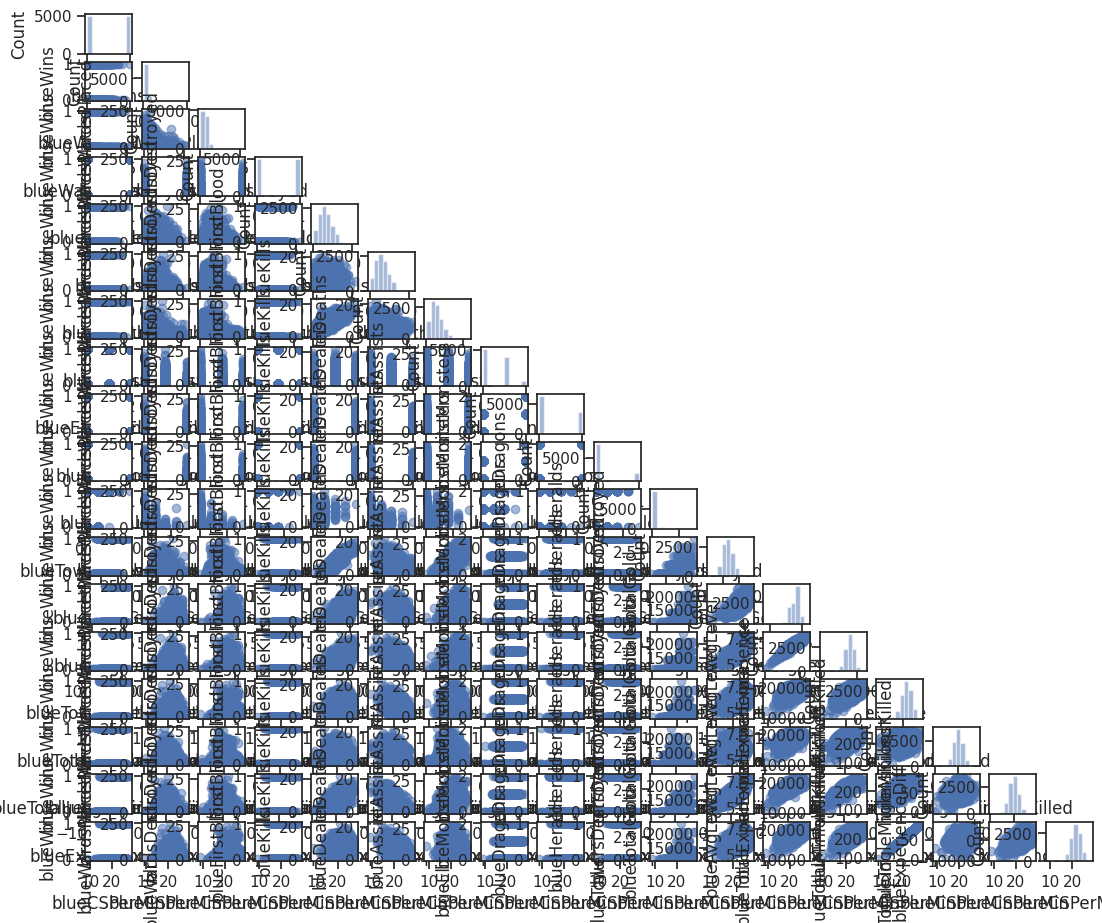

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix


# 여러분의 데이터프레임을 사용하도록 수정
cols = [
    'blueWins',
    'blueWardsPlaced',
    'blueWardsDestroyed',
    'blueFirstBlood',
    'blueKills',
    'blueDeaths',
    'blueAssists',
    'blueEliteMonsters',
    'blueDragons',
    'blueHeralds',
    'blueTowersDestroyed',
    'blueTotalGold',
    'blueAvgLevel',
    'blueTotalExperience',
    'blueTotalMinionsKilled',
    'blueTotalJungleMinionsKilled',
    'blueExperienceDiff',
    'blueCSPerMin'
]

# 여러분의 데이터프레임을 사용하도록 수정
scatterplotmatrix(data[cols].values, figsize=(13, 11),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()


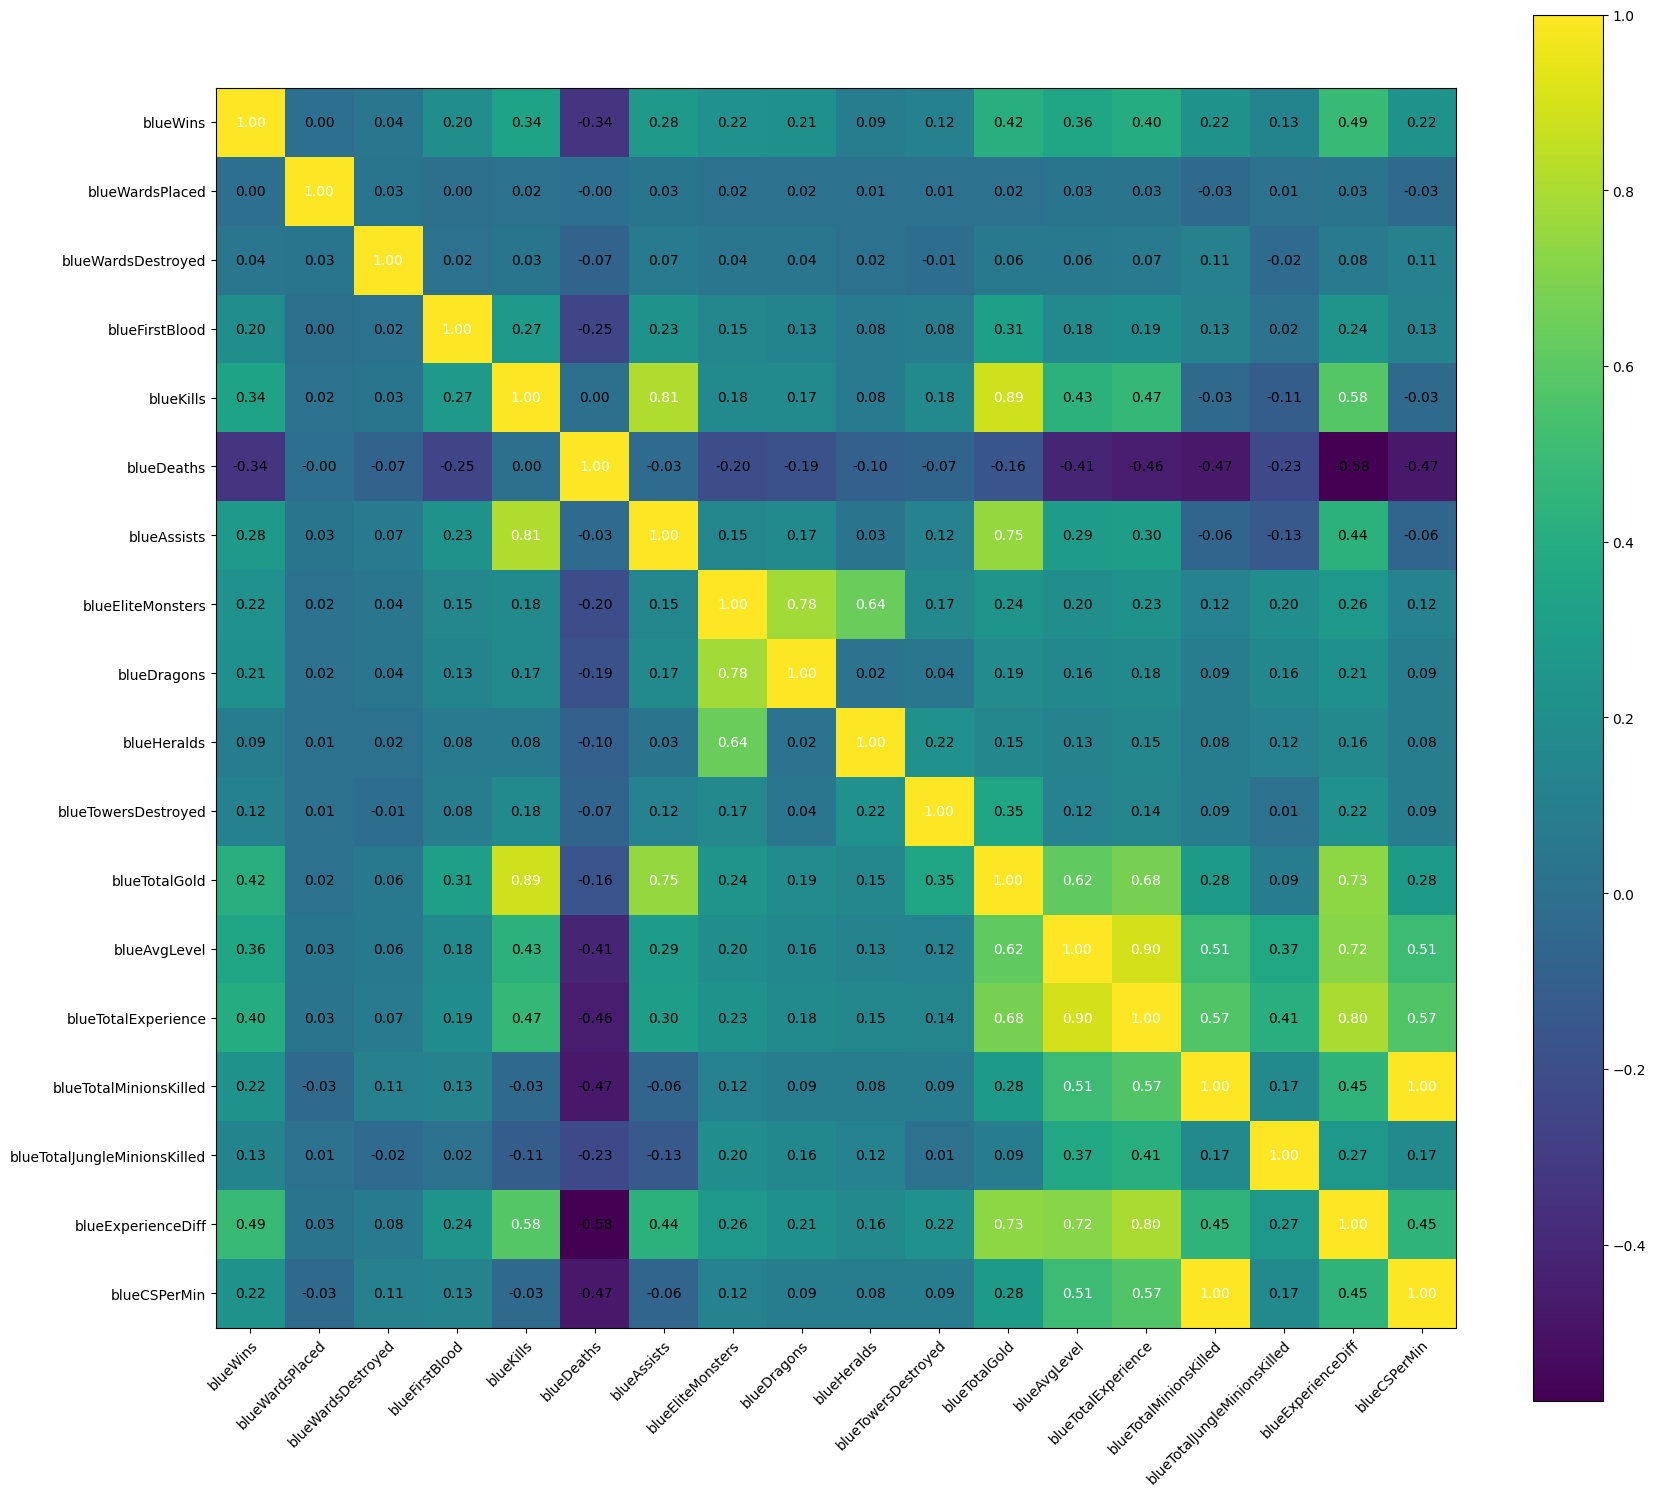

In [ ]:
import numpy as np
from mlxtend.plotting import heatmap

# 여러분의 데이터프레임을 사용하도록 수정
cm = np.corrcoef(data[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols, figsize=(20, 18))

plt.show()


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Feature1      100 non-null    float64
 1   Feature2      100 non-null    float64
 2   Feature3      100 non-null    float64
 3   blueAvgLevel  100 non-null    float64
dtypes: float64(4)
memory usage: 3.2 KB


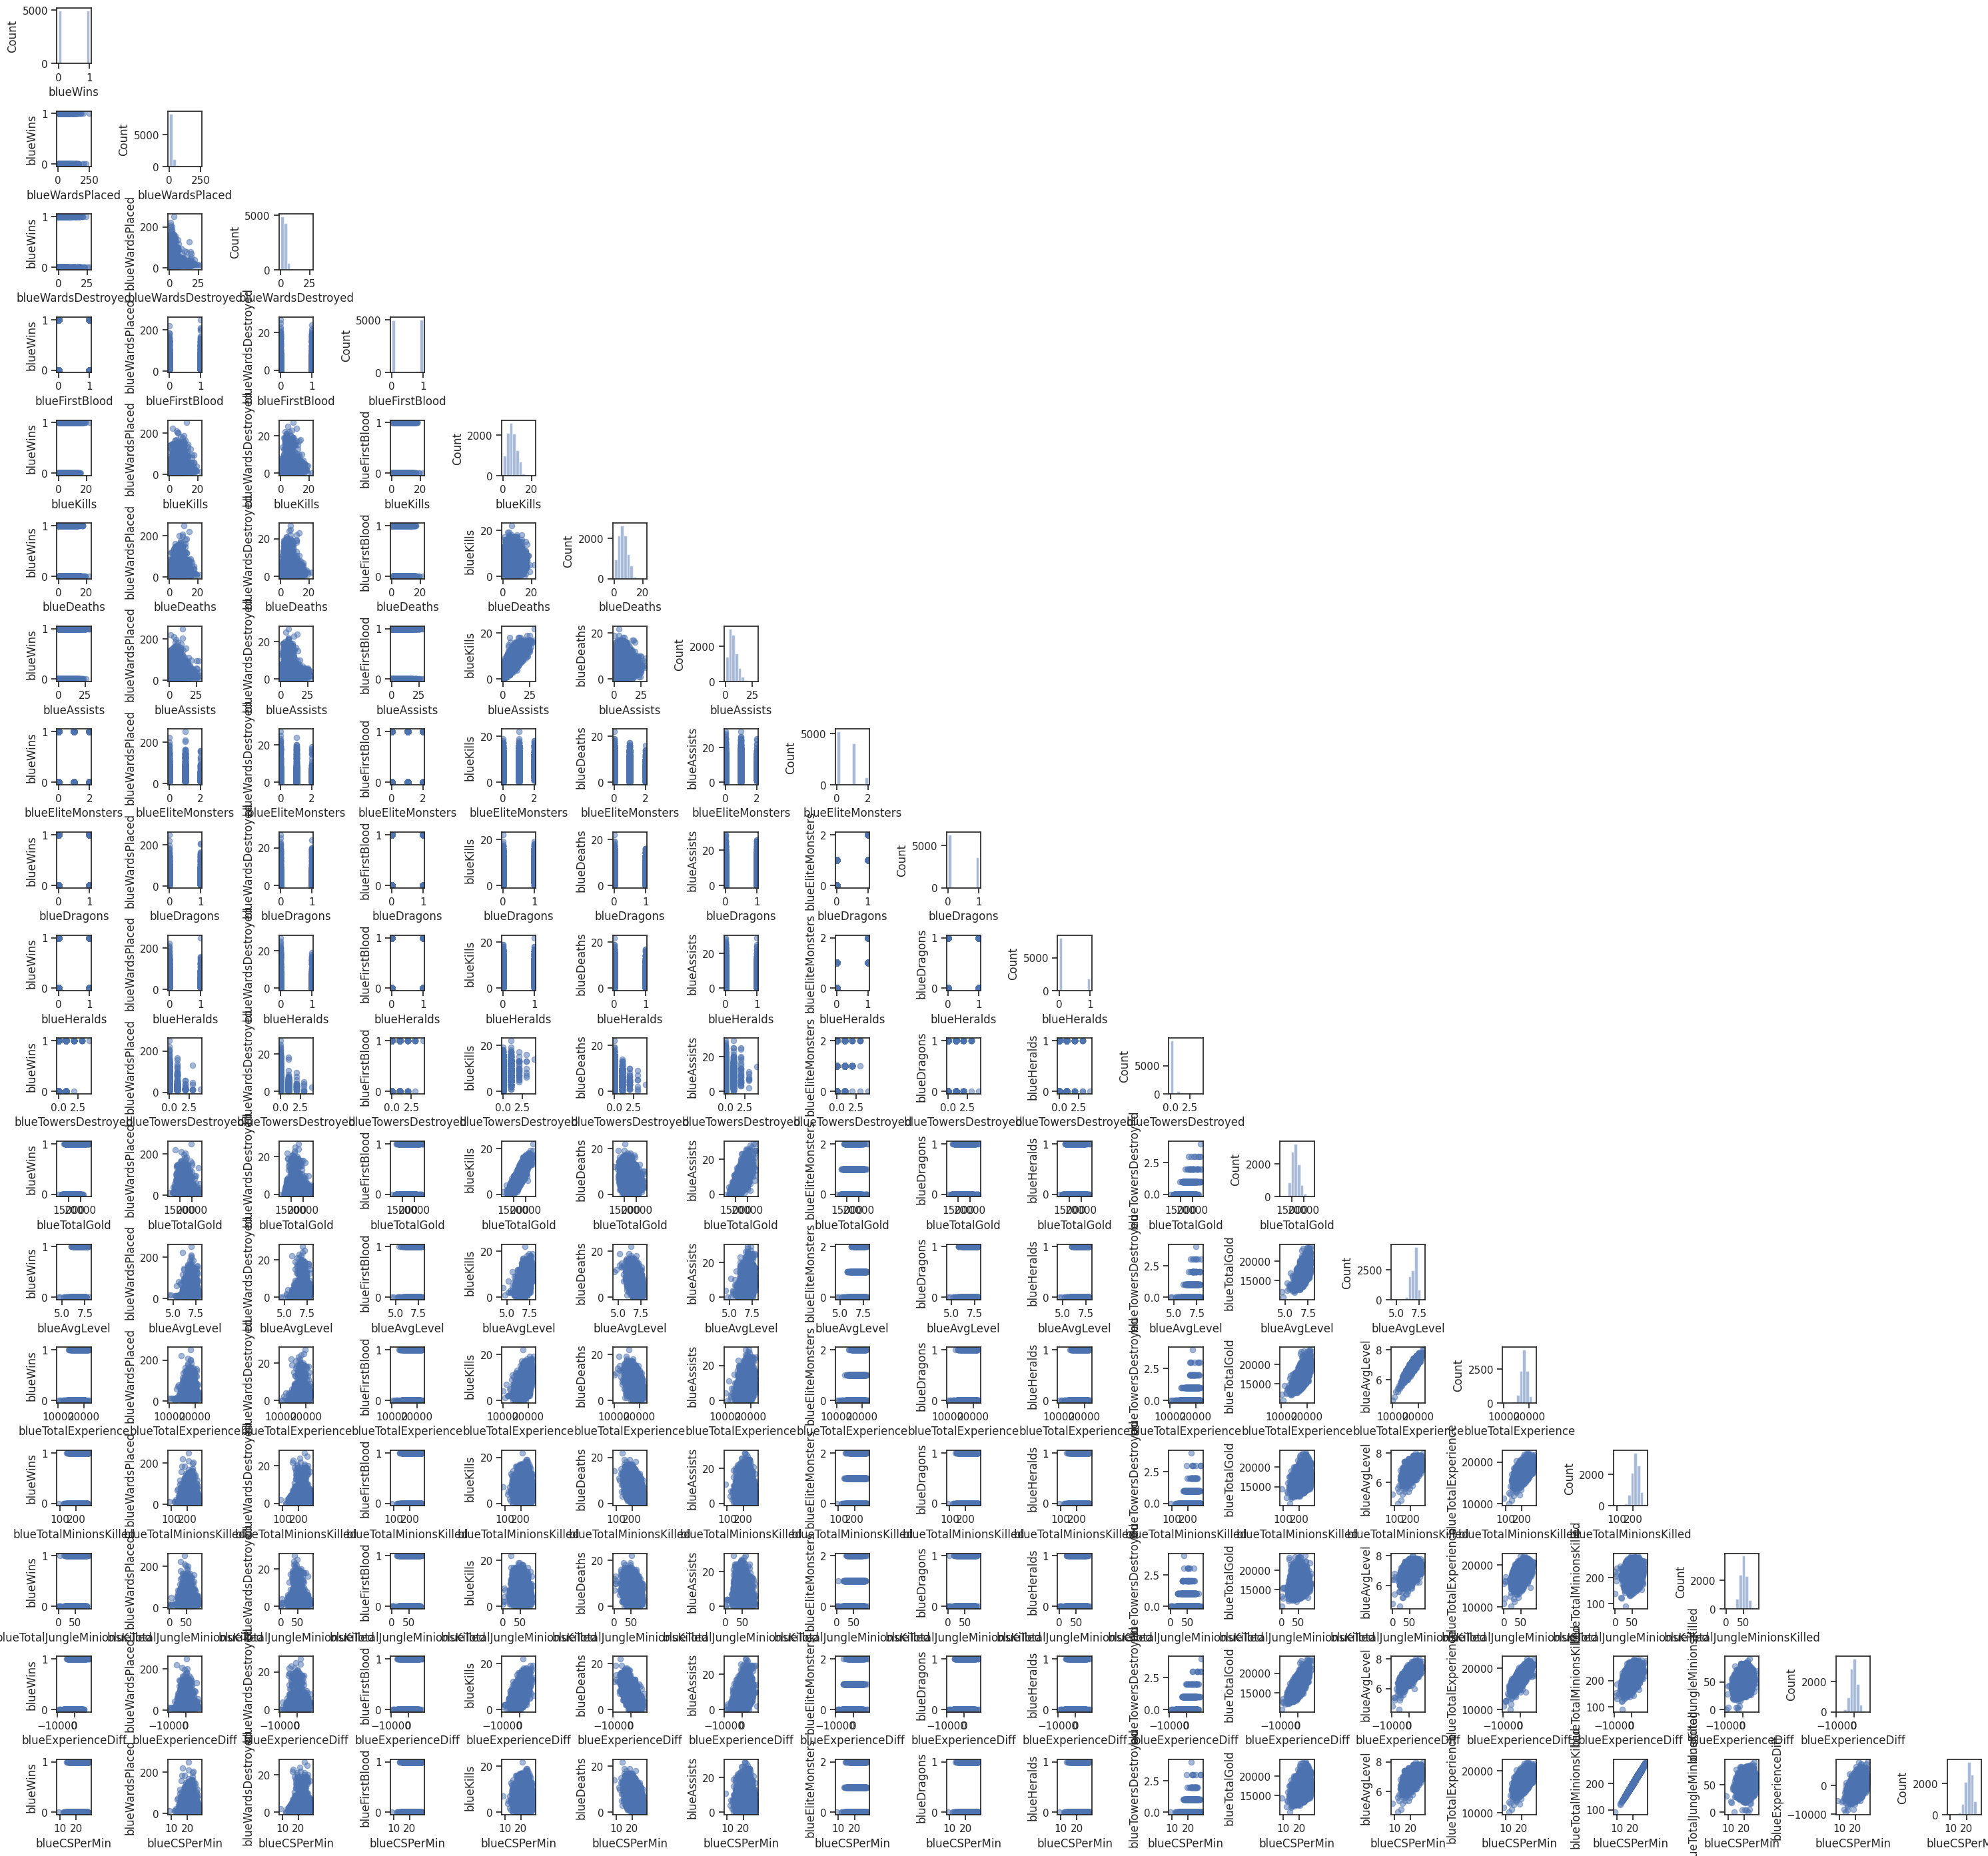

In [ ]:
cols = [
    'blueWins',
    'blueWardsPlaced',
    'blueWardsDestroyed',
    'blueFirstBlood',
    'blueKills',
    'blueDeaths',
    'blueAssists',
    'blueEliteMonsters',
    'blueDragons',
    'blueHeralds',
    'blueTowersDestroyed',
    'blueTotalGold',
    'blueAvgLevel',
    'blueTotalExperience',
    'blueTotalMinionsKilled',
    'blueTotalJungleMinionsKilled',
    'blueExperienceDiff',
    'blueCSPerMin'
]

# 그래프 크기 조정
scatterplotmatrix(data[cols].values, figsize=(30, 28),
                  names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

In [48]:
class LinearRegressionGD(object):

    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

In [47]:
class AdagradRegressor:
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.cost_ = []

    def fit(self, X, y):
        self.weights = np.zeros(1 + X.shape[1])
        for _ in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.weights[1:] += self.learning_rate / np.sqrt(np.sum(errors**2)) * X.T.dot(errors)
            self.weights[0] += self.learning_rate / np.sqrt(np.sum(errors**2)) * errors.sum()
            cost = 0.5 * np.sum(errors**2)
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.weights[1:]) + self.weights[0]

    def predict(self, X):
        return self.net_input(X)


In [61]:
X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [ ]:
X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


lr = LinearRegressionGD()
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
# plt.savefig('images/10_05.png', dpi=300)
plt.show()

In [119]:
print(data.columns)


Index(['Feature1', 'Feature2', 'Feature3', 'blueAvgLevel'], dtype='object')


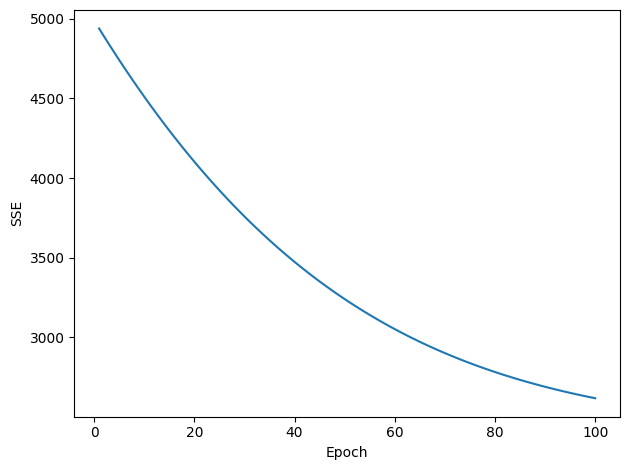

In [128]:
X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values
from sklearn.preprocessing import StandardScaler


sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()


lr = AdagradRegressor(learning_rate=0.0001, n_iter=100)
lr.fit(X_std, y_std)

plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()


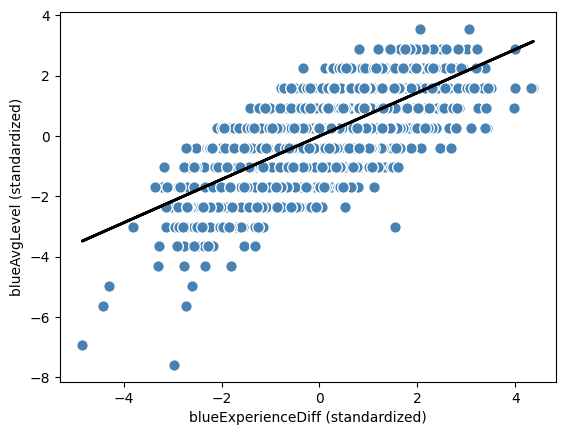

In [66]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return
lin_regplot(X_std, y_std, lr)
plt.xlabel('blueExperienceDiff (standardized)')
plt.ylabel('blueAvgLevel (standardized)')

# plt.savefig('images/10_06.png', dpi=300)
plt.show()

In [ ]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)


ransac.fit(X, y)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')

plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('blueTotalExperience (standardized)')
plt.ylabel('blueAvgLevel (standardized)')

plt.legend(loc='upper left')

# plt.savefig('images/10_08.png', dpi=300)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54364 (\N{HANGUL SYLLABLE PYO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51456 (\N{HANGUL SYLLABLE JUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46108 (\N{HANGUL SYLLABLE DOEN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


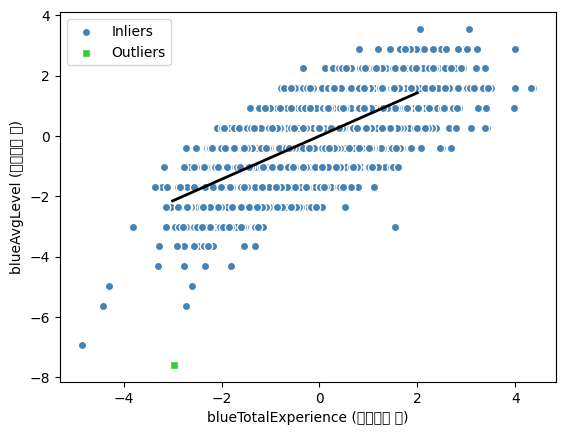

In [67]:
from sklearn.linear_model import RANSACRegressor

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',  # 'absolute_loss' 대신 'absolute_error' 사용
                         residual_threshold=5.0,
                         random_state=0)

ransac.fit(X_std, y_std)

inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

plt.scatter(X_std[inlier_mask], y_std[inlier_mask],
            c='steelblue', edgecolor='white',
            marker='o', label='Inliers')
plt.scatter(X_std[outlier_mask], y_std[outlier_mask],
            c='limegreen', edgecolor='white',
            marker='s', label='Outliers')

line_X = np.arange(-3, 3, 1)  # 데이터에 기반하여 범위 조정
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('blueTotalExperience (표준화된 값)')
plt.ylabel('blueAvgLevel (표준화된 값)')
plt.legend(loc='upper left')

plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

In [79]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6915, 16) (6915,)
(2964, 16) (2964,)


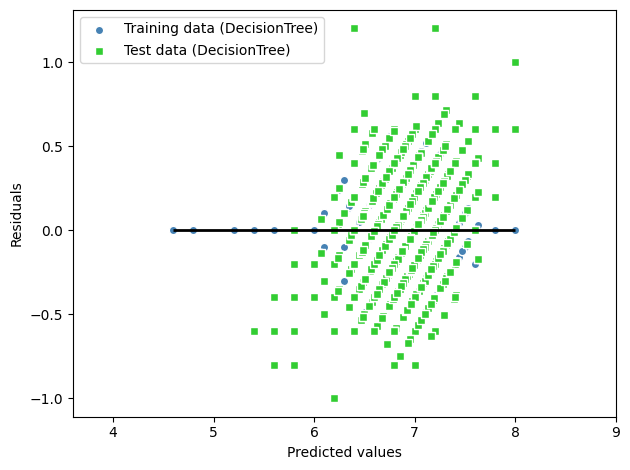

RandomForestRegressor - 훈련 MSE: 0.005, 테스트 MSE: 0.037
RandomForestRegressor - 훈련 R^2: 0.945, 테스트 R^2: 0.612
Ridge - 훈련 MSE: 0.034, 테스트 MSE: 0.034
Ridge - 훈련 R^2: 0.632, 테스트 R^2: 0.640
DecisionTreeRegressor - 훈련 MSE: 0.021, 테스트 MSE: 0.050
DecisionTreeRegressor - 훈련 R^2: 0.773, 테스트 R^2: 0.468


In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor

# RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

# Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

# DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# DecisionTreeRegressor with limited max_depth
tree = DecisionTreeRegressor(max_depth=10, random_state=0)
tree.fit(X_train, y_train)
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)


# # Plot residuals for RandomForestRegressor
# plt.scatter(y_train_pred_forest,  y_train_pred_forest - y_train,
#             c='steelblue', marker='o', edgecolor='white',
#             label='Training data (RandomForest)')
# plt.scatter(y_test_pred_forest,  y_test_pred_forest - y_test,
#             c='limegreen', marker='s', edgecolor='white',
#             label='Test data (RandomForest)')

# # Plot residuals for Ridge
# plt.scatter(y_train_pred_ridge,  y_train_pred_ridge - y_train,
#              c='steelblue', marker='o', edgecolor='white',
#             label='Training data (Ridge)')
# plt.scatter(y_test_pred_ridge,  y_test_pred_ridge - y_test,
#             c='limegreen', marker='s', edgecolor='white',
#             label='Test data (Ridge)')

# Plot residuals for DecisionTreeRegressor
plt.scatter(y_train_pred_tree,  y_train_pred_tree - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data (DecisionTree)')
plt.scatter(y_test_pred_tree,  y_test_pred_tree - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data (DecisionTree)')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred_forest.min(), y_test_pred_forest.min(), y_train_pred_ridge.min(), y_test_pred_ridge.min(), y_train_pred_tree.min(), y_test_pred_tree.min()), xmax=max(y_train_pred_forest.max(), y_test_pred_forest.max(), y_train_pred_ridge.max(), y_test_pred_ridge.max(), y_train_pred_tree.max(), y_test_pred_tree.max()), color='black', lw=2)
plt.xlim([min(y_train_pred_forest.min(), y_test_pred_forest.min(), y_train_pred_ridge.min(), y_test_pred_ridge.min(), y_train_pred_tree.min(), y_test_pred_tree.min()) - 1, max(y_train_pred_forest.max(), y_test_pred_forest.max(), y_train_pred_ridge.max(), y_test_pred_ridge.max(), y_train_pred_tree.max(), y_test_pred_tree.max()) + 1])
plt.tight_layout()

plt.show()

from sklearn.metrics import mean_squared_error, r2_score

# Print metrics for RandomForestRegressor
print('RandomForestRegressor - 훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred_forest),
        mean_squared_error(y_test, y_test_pred_forest)))
print('RandomForestRegressor - 훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred_forest),
        r2_score(y_test, y_test_pred_forest)))

# Print metrics for Ridge
print('Ridge - 훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred_ridge),
        mean_squared_error(y_test, y_test_pred_ridge)))
print('Ridge - 훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred_ridge),
        r2_score(y_test, y_test_pred_ridge)))

# Print metrics for DecisionTreeRegressor
print('DecisionTreeRegressor - 훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred_tree),
        mean_squared_error(y_test, y_test_pred_tree)))
print('DecisionTreeRegressor - 훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred_tree),
        r2_score(y_test, y_test_pred_tree)))


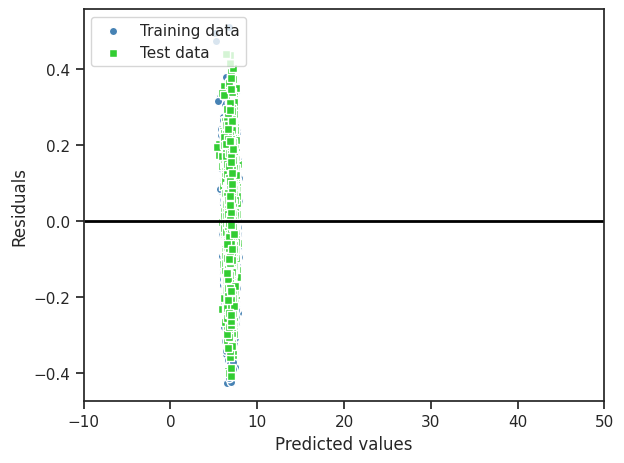

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWins                      9879 non-null   int64  
 1   blueWardsPlaced               9879 non-null   int64  
 2   blueWardsDestroyed            9879 non-null   int64  
 3   blueFirstBlood                9879 non-null   int64  
 4   blueKills                     9879 non-null   int64  
 5   blueDeaths                    9879 non-null   int64  
 6   blueAssists                   9879 non-null   int64  
 7   blueEliteMonsters             9879 non-null   int64  
 8   blueDragons                   9879 non-null   int64  
 9   blueHeralds                   9879 non-null   int64  
 10  blueTowersDestroyed           9879 non-null   int64  
 11  blueTotalGold                 9879 non-null   int64  
 12  blueAvgLevel                  9879 non-null   float64
 13  blu

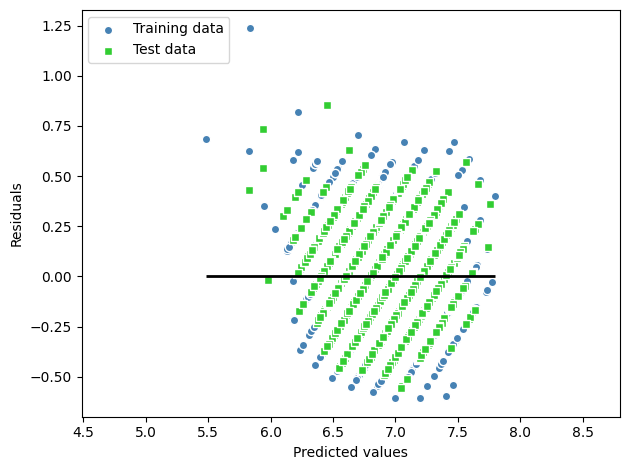

훈련 MSE: 0.035, 테스트 MSE: 0.032
훈련 R^2: 0.632, 테스트 R^2: 0.644


In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame and 'LinearRegression' class

X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='black', lw=2)
plt.xlim([min(y_train_pred.min(), y_test_pred.min()) - 1, max(y_train_pred.max(), y_test_pred.max()) + 1])
plt.tight_layout()

plt.show()

from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Assuming you have 'data' DataFrame and 'LinearRegression' class

X = data.drop('blueAvgLevel', axis=1).values
y = data['blueAvgLevel'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=min(y_train_pred.min(), y_test_pred.min()), xmax=max(y_train_pred.max(), y_test_pred.max()), color='black', lw=2)
plt.xlim([min(y_train_pred.min(), y_test_pred.min()) - 1, max(y_train_pred.max(), y_test_pred.max()) + 1])
plt.tight_layout()

plt.show()

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))


In [74]:
from sklearn.linear_model import Ridge

# Ridge 모델 초기화
ridge = Ridge(alpha=1.0)

# 훈련 데이터에 모델 학습
ridge.fit(X_train, y_train)

# 예측
y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

# 잔차 그래프 그리기
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([0, 10])
plt.tight_layout()
plt.show()


In [77]:
from sklearn.metrics import mean_squared_error

print('훈련 MSE: %.3f, 테스트 MSE: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('훈련 R^2: %.3f, 테스트 R^2: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

훈련 MSE: 0.035, 테스트 MSE: 0.032
훈련 R^2: 0.632, 테스트 R^2: 0.644


In [69]:
import numpy as np


X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values



X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')


plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('blueTotalGold')
plt.ylabel('AvgLevel')
plt.legend(loc='lower left')
plt.show()

<ipython-input-69-a564fed18515>:9: RuntimeWarning: divide by zero encountered in log
  X_log = np.log(X)
<ipython-input-69-a564fed18515>:9: RuntimeWarning: invalid value encountered in log
  X_log = np.log(X)


ValueError: ignored

In [110]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X, y)

print('DecisionTreeRegressor R^2 test: %.3f' % (
        r2_score(y, tree.predict(X))))

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('blueExperienceDiff')
plt.ylabel('blueAvgLevel')
plt.show()

DecisionTreeRegressor R^2 test: 0.531


In [70]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


X = data[['blueExperienceDiff']].values
y = data['blueAvgLevel'].values


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

print('DecisionTreeRegressor R^2 test: %.3f' % (
        r2_score(y, tree.predict(X))))

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi=300)
plt.show()

DecisionTreeRegressor R^2 test: 0.509


In [ ]:
import numpy as np


X = data[['blueTotalGold']].values
y = data['blueAvgLevel'].values



X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2=%.2f$' % linear_r2,
         color='blue',
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000\'s [MEDV]}$')
plt.legend(loc='lower left')


plt.scatter(X_log, y_sqrt, label='training points', color='lightgray')
plt.plot(X_fit, y_lin_fit, label='linear (d=1), $R^2=%.2f$' % linear_r2, color='blue', lw=2)
plt.xlabel('blueTotalGold')
plt.ylabel('AvgLevel')
plt.legend(loc='lower left')
plt.show()

In [ ]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


X = data[['blueTotalGold']].values
y = data['blueAvgLevel'].values


def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

print('DecisionTreeRegressor R^2 test: %.3f' % (
        r2_score(y, tree.predict(X))))

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
# plt.savefig('./figures/tree_regression.png', dpi=300)
plt.show()

DecisionTreeRegressor R^2 test: 0.388


In [ ]:
import sklearn
from sklearn.preprocessing import PolynomialFeatures

X = data[['blueTotalGold']].values
y = data['blueAvgLevel'].values


regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

#fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regre = regr.fit(X,y)
y_lin_fit = regr.predict(X_fit)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 단순 선형 회귀 모델
lr = LinearRegression()

# 다항 회귀 모델 (2차 다항식)
pr = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

# 훈련 데이터
X = data[['blueTotalGold']].values
y = data['blueAvgLevel'].values

# 표준화
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

# 단순 선형 회귀 모델 훈련
lr.fit(X_std, y)

# 다항 회귀 모델 훈련
pr.fit(X_std, y)

# 훈련 데이터에 대한 예측
y_lin_pred = lr.predict(X_std)
y_quad_pred = pr.predict(X_std)

# 성능 평가
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

print(f'MSE\tLinear : {mse_lin:.2f},\tQuadratic: {mse_quad:.2f}')
print(f'R2\tLinear : {r2_lin:.2f},\tQuadratic: {r2_quad:.2f}')

# 그래프 그리기
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
X_fit_std = sc_x.transform(X_fit)
y_lin_fit = lr.predict(X_fit_std)
y_quad_fit = pr.predict(X_fit_std)

plt.scatter(X_std, y, label='Training data')
plt.plot(X_fit_std, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit_std, y_quad_fit, label='Quadratic fit')
plt.legend(loc='upper left')
plt.xlabel('blueTotalExperience (Standardized)')
plt.ylabel('blueAvgLevel')
plt.show()


MSE	Linear : 0.06,	Quadratic: 0.06
R2	Linear : 0.38,	Quadratic: 0.40


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 단순 선형 회귀 모델
lr = LinearRegression()

# 다항 회귀 모델 (2차 다항식)
pr = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), LinearRegression())

# 훈련 데이터
X = data[['blueTotalExperience']].values
y = data['blueAvgLevel'].values

# 표준화
sc_x = StandardScaler()
X_std = sc_x.fit_transform(X)

# 단순 선형 회귀 모델 훈련
lr.fit(X_std, y)

# 다항 회귀 모델 훈련
pr.fit(X_std, y)

# 훈련 데이터에 대한 예측
y_lin_pred = lr.predict(X_std)
y_quad_pred = pr.predict(X_std)

# 성능 평가
mse_lin = mean_squared_error(y, y_lin_pred)
mse_quad = mean_squared_error(y, y_quad_pred)

r2_lin = r2_score(y, y_lin_pred)
r2_quad = r2_score(y, y_quad_pred)

print(f'MSE\tLinear : {mse_lin:.2f},\tQuadratic: {mse_quad:.2f}')
print(f'R2\tLinear : {r2_lin:.2f},\tQuadratic: {r2_quad:.2f}')

# 그래프 그리기
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
X_fit_std = sc_x.transform(X_fit)
y_lin_fit = lr.predict(X_fit_std)
y_quad_fit = pr.predict(X_fit_std)

plt.scatter(X_std, y, label='Training data')
plt.plot(X_fit_std, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit_std, y_quad_fit, label='Quadratic fit')
plt.legend(loc='upper left')
plt.xlabel('blueTotalExperience (Standardized)')
plt.ylabel('blueAvgLevel')
plt.show()


MSE	Linear : 0.02,	Quadratic: 0.02
R2	Linear : 0.81,	Quadratic: 0.81


In [ ]:
print(X.shape)

(9879, 17)


MSE train: 0.034, test: 0.038
R^2 train: 0.627, test: 0.598


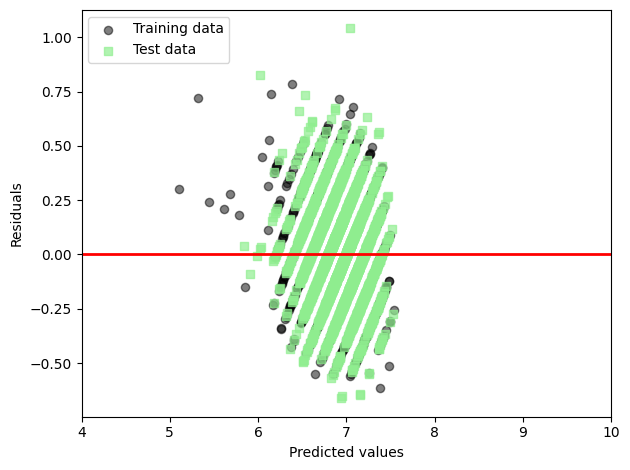

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 'blueAvgLevel'을 제외한 모든 열을 X에 할당
X = data.drop('blueAvgLevel', axis=1).values

# 'blueAvgLevel' 열을 y에 할당
y = data['blueAvgLevel'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

# Random Forest 모델 파라미터 조정
forest = RandomForestRegressor(n_estimators=500,
                               criterion='squared_error',
                               max_depth=5,
                               min_samples_split=2,
                               min_samples_leaf=2,
                               random_state=1,
                               n_jobs=--1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

# 잔차 그래프 그리기
plt.scatter(y_train_pred,
            y_train_pred - y_train,
            c='black',
            marker='o',
            s=35,
            alpha=0.5,
            label='Training data')
plt.scatter(y_test_pred,
            y_test_pred - y_test,
            c='lightgreen',
            marker='s',
            s=35,
            alpha=0.7,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([4, 10])  # x 축의 범위를 0에서 10으로 제한
plt.tight_layout()

plt.show()

In [ ]:
#데이터 정규화

from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt

# 정규화된 데이터를 히스토그램으로 시각화
plt.figure(figsize=(12, 8))

for i in range(X_train_norm.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.hist(X_train_norm[:, i], bins=30, color='blue', alpha=0.5, label='Train')
    plt.hist(X_test_norm[:, i], bins=30, color='red', alpha=0.5, label='Test')
    plt.title(f'Feature {i + 1}')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
#데이터 표준화

from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
x_test_std = stdsc.transform(X_test)

In [ ]:
import matplotlib.pyplot as plt

# 정규화된 데이터를 히스토그램으로 시각화
plt.figure(figsize=(12, 8))

for i in range(X_train_sed.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.hist(X_train_std[:, i], bins=30, color='blue', alpha=0.5, label='Train')
    plt.hist(x_test_std[:, i], bins=30, color='red', alpha=0.5, label='Test')
    plt.title(f'Feature {i + 1}')
    plt.xlabel('Standardized Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


NameError: ignored

<Figure size 1200x800 with 0 Axes>

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(6915, 17) (6915,)
(2964, 17) (2964,)


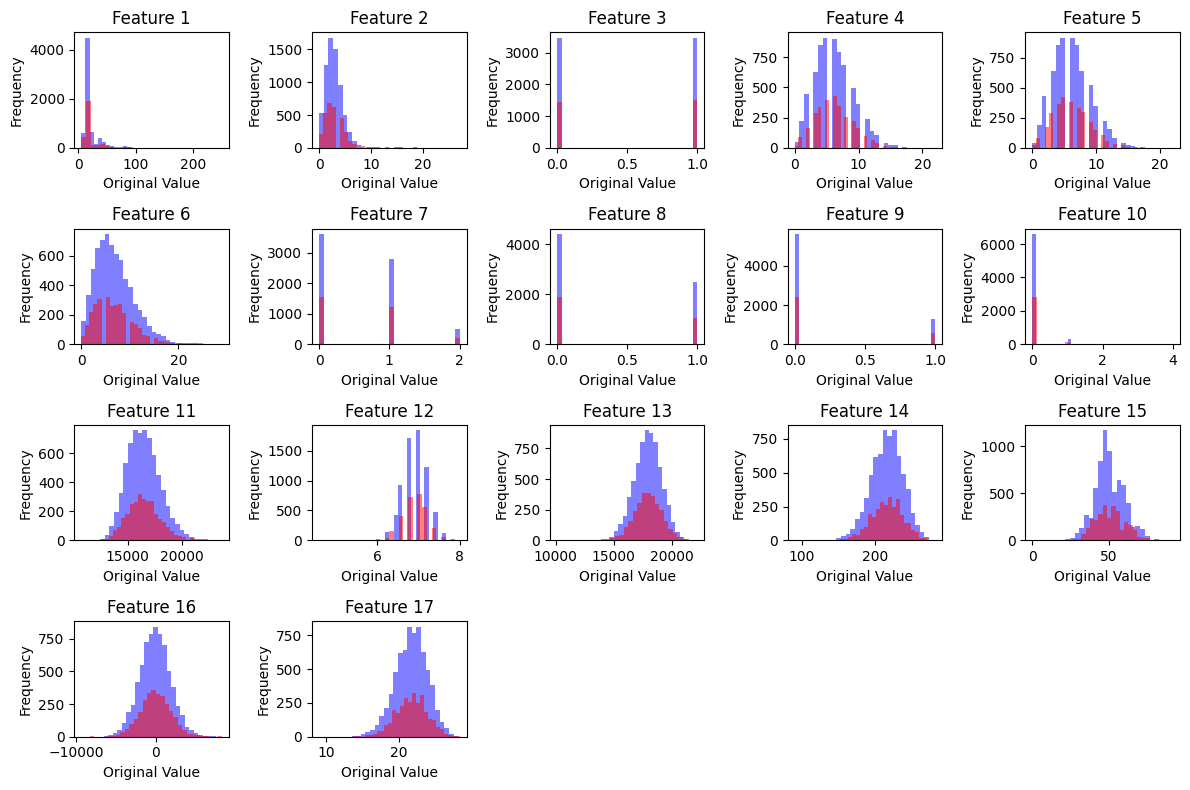

In [ ]:
import matplotlib.pyplot as plt

# 원래 데이터를 히스토그램으로 시각화
plt.figure(figsize=(12, 8))

for i in range(X_train.shape[1]):
    plt.subplot(4, 5, i + 1)
    plt.hist(X_train[:, i], bins=30, color='blue', alpha=0.5, label='Train')
    plt.hist(X_test[:, i], bins=30, color='red', alpha=0.5, label='Test')
    plt.title(f'Feature {i + 1}')
    plt.xlabel('Original Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
print(X_train[0])
print()
print(X_train_norm[0])
print()
print(X_train_sed[0])

[1.0000e+00 1.9000e+01 1.0000e+01 1.0000e+00 1.1000e+01 9.0000e+00
 9.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.8581e+04
 1.9012e+04 2.3900e+02 3.6000e+01 5.0800e+02 2.3900e+01]



NameError: ignored

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
def model_train_test(model):
    model.fit(X_train_std, y_train)
    y_predict = model.predict(x_test_std)
    print(classification_report(y_test, y_predict))
    ConfusionMatrixDisplay.from_estimator(model, x_test_std, y_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 10)

model_train_test(knn)

ValueError: ignored

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mp

In [ ]:
max_accuracies = {}
score = []


for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_std, y_train)
    score.append(knn.score(x_test_std, y_test))

mp.pyplot.plot(range(1, 25), score)
mp.pyplot.xticks(np.arange(1, 25, 1))
mp.pyplot.xlabel("Number of neighbours")
mp.pyplot.ylabel("Accuracy")
mp.pyplot.show()

max_accuracy = max(score) * 100
max_accuracies["KNN"] = max_accuracy
max_accuracy_K = score.index(max(score)) + 1

print("Maximum accuracy of K-Nearest Neighbours is {:.2f}%".format(max_accuracies["KNN"]),"with number of neighbours set to",max_accuracy_K,"neighbours.")

ValueError: ignored

In [ ]:

algorithm = ["K-Nearest Neighbour", "Logistic Regression", "Decision Tree", "Random Forest", "Naive Bayes", "Support Vector Machine"]
classifiers = [KNeighborsClassifier(n_neighbors = max_accuracy_K), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), naive_bayes.GaussianNB(), svm.SVC(kernel = "linear")]

result = []

for c in classifiers:
    c.fit(X_train_std, y_train)
    y_predict = c.predict(x_test_std)
    accuracy = accuracy_score(y_test, y_predict)
    result.append(accuracy)
result_lol_predict = pd.DataFrame(result, index = algorithm)
result_lol_predict.columns = ["Algorithm accuracy"]
result_lol_predict.sort_values(by = "Algorithm accuracy", ascending = False)

NameError: ignored

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# # 회귀 알고리즘 선택
# regressor = RandomForestRegressor(n_estimators=500, random_state=1)

# # 모델 훈련
# regressor.fit(X_train_std, y_train)

# # 승률 예측
# y_pred = regressor.predict(x_test_std)

# # 평가는 평균 제곱 오차(MSE) 사용
# mse = mean_squared_error(y_test, y_pred)
# print(f'평균 제곱 오차: {mse}')

평균 제곱 오차: 0.18861447908232118


NameError: ignored

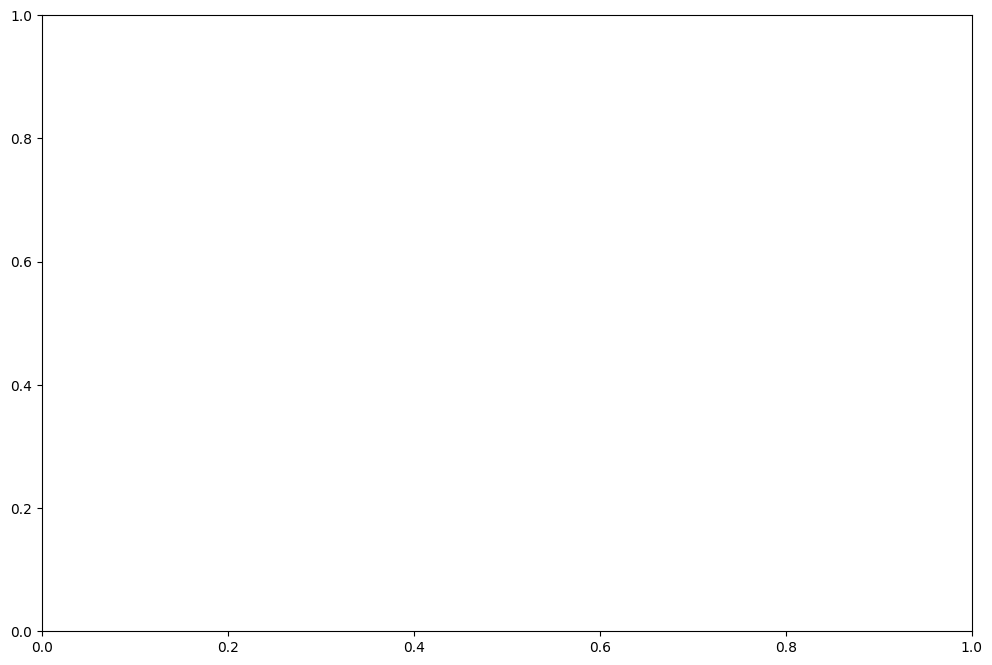

In [ ]:
#Sparse solutions with L1 regularization

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np

# 데이터셋에 따라서는 필요한 라이브러리와 데이터를 추가로 import해야 할 수 있습니다.

# Assuming X_train_std and y_train are your standardized features and labels
fig = plt.figure(figsize=(12, 8))
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 'magenta',
          'yellow', 'black', 'pink', 'lightgreen',
          'lightblue', 'gray', 'indigo', 'orange',
          'brown', 'purple', 'olive', 'lime']

feature_names = ['blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood', 'blueKills',
                 'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons', 'blueHeralds',
                 'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience',
                 'blueTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'blueExperienceDiff',
                 'blueCSPerMin']

weights, params = [], []

# Assuming X_train_std is your standardized feature matrix
for c in np.arange(-4., 6.):
    lr = LogisticRegression(solver='liblinear', penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[0])  # Assuming only one feature is visualized
    params.append(10**c)

weights = np.array(weights)

for col, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, col], label=feature_names[col], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Weight Coefficient')
plt.xlabel('C (Regularization Parameter)')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1.03), ncol=1, fancybox=True)
plt.title('Logistic Regression Coefficients with L1 Regularization')
plt.show()


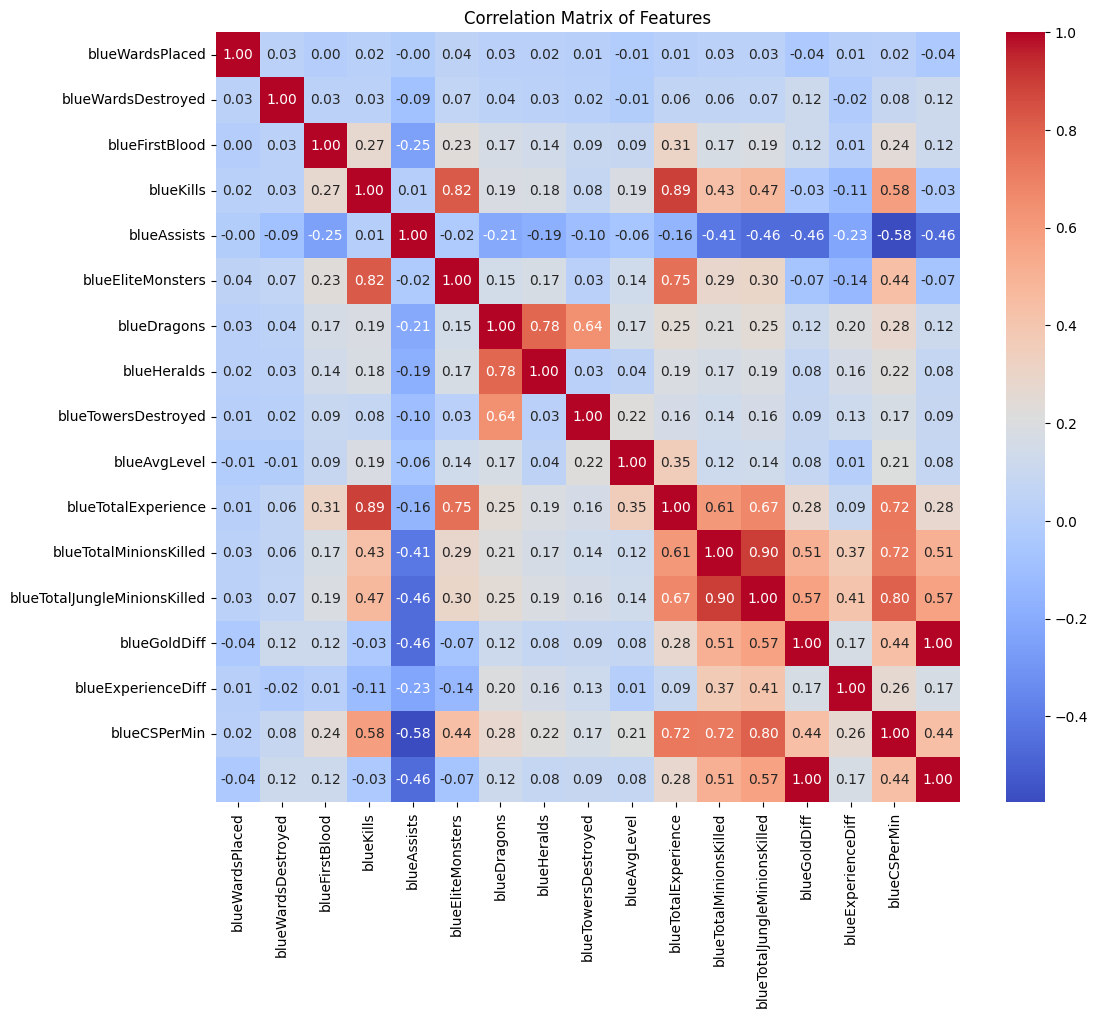

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# X_train을 사용하여 상관 행렬을 생성
correlation_matrix = np.corrcoef(X_train, rowvar=False)

# seaborn 라이브러리를 사용하여 히트맵으로 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=feat_labels, yticklabels=feat_labels)
plt.title('Correlation Matrix of Features')
plt.show()
